# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [102]:
from citipy import citipy
from random import uniform
from config import api_key
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
import csv


## Generate Cities List

In [21]:
cities = []
# generate more than 500 to cover duplicates and errors
while len(cities) < 600:
    lat = round(uniform(-90, 90), 3)
    long = round(uniform(-180, 180), 3)
    city = citipy.nearest_city(lat,long)
    city_name = city.city_name
    country_code = city.country_code
    city_vals = f"{city_name}, {country_code}"
    # add cities to list
    if city_vals not in cities:
        cities.append(city_vals)
        print(f"{city_vals} added to list.")
len(cities)

susanville, us added to list.
port alfred, za added to list.
rikitea, pf added to list.
korgen, no added to list.
albany, au added to list.
saskylakh, ru added to list.
arrifes, pt added to list.
east london, za added to list.
bambous virieux, mu added to list.
meyungs, pw added to list.
vila franca do campo, pt added to list.
codrington, ag added to list.
dothan, us added to list.
avarua, ck added to list.
saint-philippe, re added to list.
ushuaia, ar added to list.
vaini, to added to list.
rocha, uy added to list.
calatayud, es added to list.
atuona, pf added to list.
sechura, pe added to list.
montepuez, mz added to list.
new norfolk, au added to list.
barentsburg, sj added to list.
cape town, za added to list.
san cristobal, ec added to list.
punta arenas, cl added to list.
los llanos de aridane, es added to list.
bluff, nz added to list.
mataura, pf added to list.
nanortalik, gl added to list.
sitka, us added to list.
puerto ayora, ec added to list.
pedernales, do added to list.
o

kahului, us added to list.
saravena, co added to list.
celestun, mx added to list.
half moon bay, us added to list.
batagay-alyta, ru added to list.
hohhot, cn added to list.
dhidhdhoo, mv added to list.
qasigiannguit, gl added to list.
little chute, us added to list.
suoyarvi, ru added to list.
rawson, ar added to list.
belyy yar, ru added to list.
surt, ly added to list.
sao joao da barra, br added to list.
huangchuan, cn added to list.
anadyr, ru added to list.
creel, mx added to list.
camana, pe added to list.
lithgow, au added to list.
trat, th added to list.
saint-pierre, pm added to list.
portobelo, pa added to list.
berlevag, no added to list.
yataity del norte, py added to list.
dergachi, ru added to list.
impfondo, cg added to list.
euclid, us added to list.
maxixe, mz added to list.
ust-kuyga, ru added to list.
verkhnevilyuysk, ru added to list.
denpasar, id added to list.
bertoua, cm added to list.
ixtapa, mx added to list.
eyl, so added to list.
poum, nc added to list.
nio

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
weather = []
wrec = []
wrec = 1
url = 'http://api.openweathermap.org/data/2.5/weather?'
for x in cities:
    request = url + "appid=" + api_key + "&q=" + x + "?" + "&units=imperial"
    print(f"Processing record {wrec}: data for {x}")
    response = requests.get(request)
    weather_data = response.json()
    # skip errors
    if weather_data['cod'] == 200:
        weather.append(weather_data)
    # increase record count    
    wrec = wrec+1


Processing record 1: data for susanville, us
Processing record 2: data for port alfred, za
Processing record 3: data for rikitea, pf
Processing record 4: data for korgen, no
Processing record 5: data for albany, au
Processing record 6: data for saskylakh, ru
Processing record 7: data for arrifes, pt
Processing record 8: data for east london, za
Processing record 9: data for bambous virieux, mu
Processing record 10: data for meyungs, pw
Processing record 11: data for vila franca do campo, pt
Processing record 12: data for codrington, ag
Processing record 13: data for dothan, us
Processing record 14: data for avarua, ck
Processing record 15: data for saint-philippe, re
Processing record 16: data for ushuaia, ar
Processing record 17: data for vaini, to
Processing record 18: data for rocha, uy
Processing record 19: data for calatayud, es
Processing record 20: data for atuona, pf
Processing record 21: data for sechura, pe
Processing record 22: data for montepuez, mz
Processing record 23: da

Processing record 184: data for atyrau, kz
Processing record 185: data for esperance, au
Processing record 186: data for severo-kurilsk, ru
Processing record 187: data for ribeira grande, pt
Processing record 188: data for san quintin, mx
Processing record 189: data for attawapiskat, ca
Processing record 190: data for aksarka, ru
Processing record 191: data for charters towers, au
Processing record 192: data for kroya, id
Processing record 193: data for killarney, ca
Processing record 194: data for puri, in
Processing record 195: data for acajutla, sv
Processing record 196: data for kununurra, au
Processing record 197: data for naze, jp
Processing record 198: data for pisco, pe
Processing record 199: data for kiunga, pg
Processing record 200: data for aykhal, ru
Processing record 201: data for lagos, pt
Processing record 202: data for palabuhanratu, id
Processing record 203: data for cabo san lucas, mx
Processing record 204: data for ponta do sol, cv
Processing record 205: data for ngu

Processing record 366: data for tsihombe, mg
Processing record 367: data for tarrafal, cv
Processing record 368: data for buraydah, sa
Processing record 369: data for oyama, jp
Processing record 370: data for nueva germania, py
Processing record 371: data for borlange, se
Processing record 372: data for rio brilhante, br
Processing record 373: data for hereford, us
Processing record 374: data for sterlibashevo, ru
Processing record 375: data for lamu, ke
Processing record 376: data for poykovskiy, ru
Processing record 377: data for nishihara, jp
Processing record 378: data for lodwar, ke
Processing record 379: data for naters, ch
Processing record 380: data for beloha, mg
Processing record 381: data for clyde river, ca
Processing record 382: data for bandarbeyla, so
Processing record 383: data for norman wells, ca
Processing record 384: data for auki, sb
Processing record 385: data for clovis, us
Processing record 386: data for biltine, td
Processing record 387: data for peleduy, ru
Pr

Processing record 548: data for uray, ru
Processing record 549: data for zabaykalsk, ru
Processing record 550: data for egvekinot, ru
Processing record 551: data for benghazi, ly
Processing record 552: data for birjand, ir
Processing record 553: data for makasar, id
Processing record 554: data for namibe, ao
Processing record 555: data for zhigansk, ru
Processing record 556: data for tarko-sale, ru
Processing record 557: data for palana, ru
Processing record 558: data for jujuy, ar
Processing record 559: data for lima, pe
Processing record 560: data for catalao, br
Processing record 561: data for insar, ru
Processing record 562: data for bergen, de
Processing record 563: data for manaure, co
Processing record 564: data for dvinskoy, ru
Processing record 565: data for gornozavodsk, ru
Processing record 566: data for karaul, ru
Processing record 567: data for asheboro, us
Processing record 568: data for kulhudhuffushi, mv
Processing record 569: data for bereda, so
Processing record 570: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [182]:
# create empty lists for each column
city = []
country = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

# iterate through the data to fill the lists
for x in weather:
        city.append(x['name'])
        country.append(x['sys']['country'])
        lat.append(x["coord"]['lat'])
        lng.append(x["coord"]['lon'])
        max_temp.append(x['main']['temp_max'])
        humidity.append(x['main']['humidity'])
        cloudiness.append(x['clouds']['all'])
        wind_speed.append(x['wind']['speed'])
        date.append(x['dt'])
# create the dataframe from the lists
weather_df = pd.DataFrame({
    'city':city,
    'country':country,
    'lat':lat,
    'lng':lng, 
    "max_temp":max_temp, 
    "humidity":humidity, 
    "cloudiness":cloudiness, 
    "wind_speed":wind_speed, 
    "date":date 
})

weather_df[["lat", "lng", "max_temp", "humidity", "cloudiness", "wind_speed", "date"]] = weather_df[["lat", "lng", "max_temp", "humidity", "cloudiness", "wind_speed", "date"]].astype(int)

# write data to a CSV file and show the dataframe
weather_df.to_csv('weather_data.csv', mode = 'w', index=False, header=True)
weather_df.head(10)


,city,country,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
0,Susanville,US,40,-120,71,6,1,3,1619655810
1,Port Alfred,ZA,-33,26,66,79,98,8,1619655836
2,Rikitea,PF,-23,-134,76,66,41,10,1619655836
3,Korgen,NO,66,13,35,73,91,2,1619655836
4,Albany,US,42,-73,57,86,96,2,1619655837
5,Saskylakh,RU,71,114,23,88,87,7,1619655837
6,Arrifes,PT,37,-25,57,72,75,3,1619655837
7,East London,ZA,-33,27,68,73,100,4,1619655838
8,Bambous Virieux,MU,-20,57,77,83,75,11,1619655838
9,Vila Franca do Campo,PT,37,-25,57,72,75,3,1619655838


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [107]:
humid = weather_df['humidity'].max()
print(humid)
# no cities were above 100%, no action needed

100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

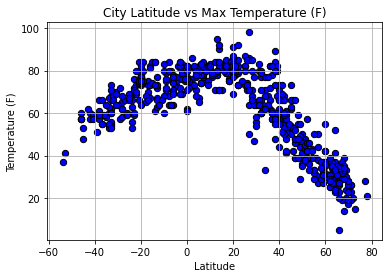

In [168]:
plt.scatter(weather_df['lat'], weather_df['max_temp'],color='blue',s=40, edgecolor='black')
plt.grid(which = 'both')
plt.title('City Latitude vs Max Temperature (F)')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig('City Latitude vs Max Temperature (F).png')
plt.show()

## Latitude vs. Humidity Plot

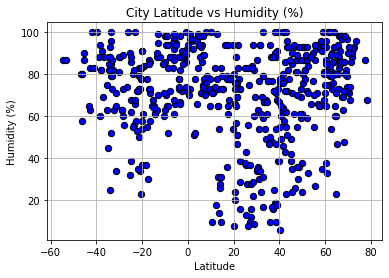

In [98]:
plt.scatter(weather_df['lat'], weather_df['humidity'],color='blue',s=40, edgecolor='black')
plt.grid(which = 'both')
plt.title('City Latitude vs Humidity (%)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('City Latitude vs Humidity (%).png')
plt.show()

## Latitude vs. Cloudiness Plot

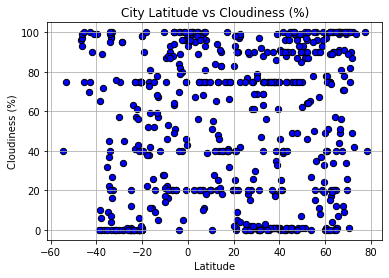

In [99]:
plt.scatter(weather_df['lat'], weather_df['cloudiness'],color='blue',s=40, edgecolor='black')
plt.grid(which = 'both')
plt.title('City Latitude vs Cloudiness (%)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('City Latitude vs Cloudiness (%).png')
plt.show()

## Latitude vs. Wind Speed Plot

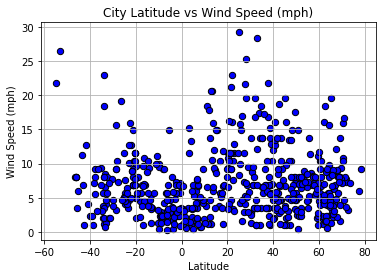

In [100]:
plt.scatter(weather_df['lat'], weather_df['wind_speed'],color='blue',s=40, edgecolor='black')
plt.grid(which = 'both')
plt.title('City Latitude vs Wind Speed (mph)')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('City Latitude vs Wind Speed (mph).png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7842352528046554


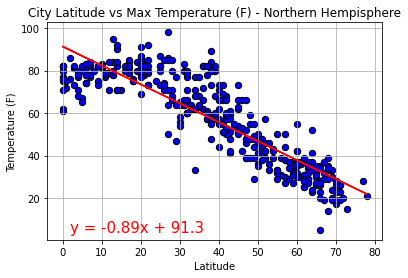

In [170]:
nh = weather_df[weather_df['lat'] >= 0]
x_values = nh['lat']
y_values = nh['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='blue',s=40, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=15,color="red")
plt.grid(which = 'both')
plt.title('City Latitude vs Max Temperature (F) - Northern Hempisphere')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere linregress Latitude vs Max Temp(F).png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49775022177875816


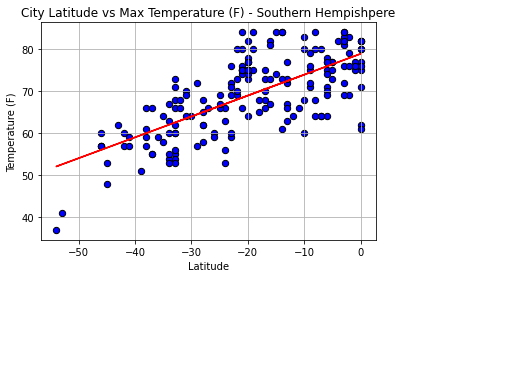

In [172]:
sh = weather_df[weather_df['lat'] <= 0]
x_values = sh['lat']
y_values = sh['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='blue',s=40, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=15,color="red")
plt.grid(which = 'both')
plt.title('City Latitude vs Max Temperature (F) - Southern Hempishpere')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere linregress Latitude vs Max Temp(F).png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.019094104686565787


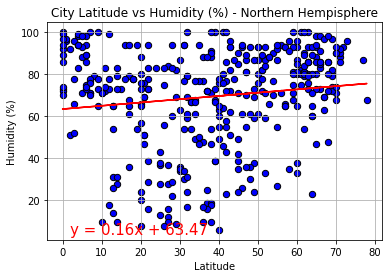

In [177]:
nh = weather_df[weather_df['lat'] >= 0]
x_values = nh['lat']
y_values = nh['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='blue',s=40, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=15,color="red")
plt.grid(which = 'both')
plt.title('City Latitude vs Humidity (%) - Northern Hempisphere')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere linregress Latitude vs Humidity (%).png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011321895853890067


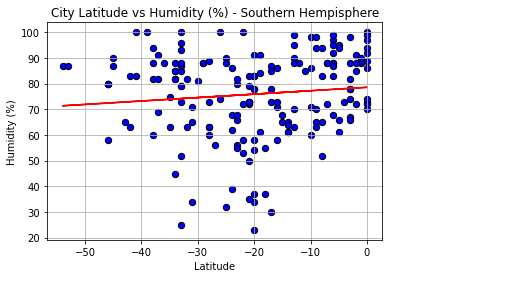

In [176]:
sh = weather_df[weather_df['lat'] <= 0]
x_values = sh['lat']
y_values = sh['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='blue',s=40, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=15,color="red")
plt.grid(which = 'both')
plt.title('City Latitude vs Humidity (%) - Southern Hempisphere')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere linregress Latitude vs Humidity (%).png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009599222072212691


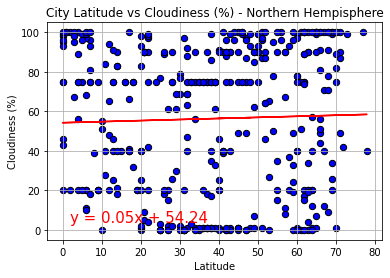

In [178]:
nh = weather_df[weather_df['lat'] >= 0]
x_values = nh['lat']
y_values = nh['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='blue',s=40, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=15,color="red")
plt.grid(which = 'both')
plt.title('City Latitude vs Cloudiness (%) - Northern Hempisphere')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere linregress Latitude vs Cloudiness (%).png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.017369663397289403


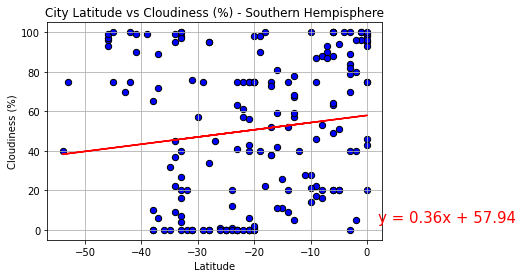

In [179]:
sh = weather_df[weather_df['lat'] <= 0]
x_values = sh['lat']
y_values = sh['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='blue',s=40, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=15,color="red")
plt.grid(which = 'both')
plt.title('City Latitude vs Cloudiness (%) - Southern Hempisphere')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere linregress Latitude vs Cloudiness (%).png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00012319593994374931


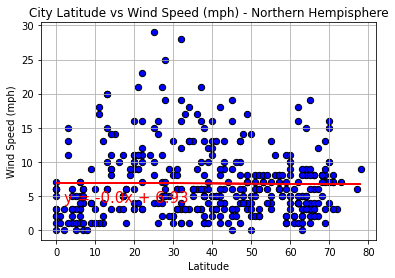

In [180]:
nh = weather_df[weather_df['lat'] >= 0]
x_values = nh['lat']
y_values = nh['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='blue',s=40, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=15,color="red")
plt.grid(which = 'both')
plt.title('City Latitude vs Wind Speed (mph) - Northern Hempisphere')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere linregress Latitude vs Wind Speed (mph).png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10890691005301745


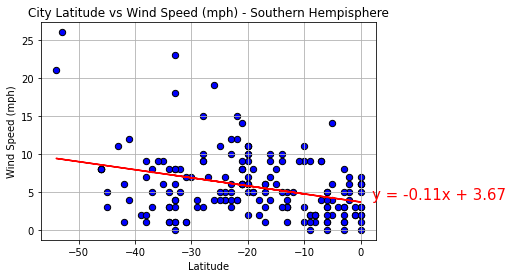

In [181]:
sh = weather_df[weather_df['lat'] <= 0]
x_values = sh['lat']
y_values = sh['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='blue',s=40, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,4),fontsize=15,color="red")
plt.grid(which = 'both')
plt.title('City Latitude vs Wind Speed (mph) - Southern Hempisphere')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere linregress Latitude vs Wind Speed (mph).png')
plt.show()